In [2]:
from google.colab import drive
drive.mount("/content/drive")
import os
os.chdir("/content/drive/MyDrive/Colab")

Mounted at /content/drive


In [3]:
#!pip install tensorflow

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [5]:
train_dir="/content/drive/MyDrive/Colab/Dataset_CLOCKS/train"
test_dir="/content/drive/MyDrive/Colab/Dataset_CLOCKS/test"
valid_dir="/content/drive/MyDrive/Colab/Dataset_CLOCKS/valid"

In [6]:
# Cargar el dataset desde carpetas
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.7,
    subset="training",
    seed=123,
    image_size=(128, 128),
    batch_size=32,
    color_mode='rgb'
)

test_data = image_dataset_from_directory(
    test_dir,
    image_size=(128, 128),
    batch_size=32,
    color_mode='rgb'
)

valid_data = image_dataset_from_directory(
    valid_dir,
    image_size=(128, 128),
    batch_size=32,
    color_mode='rgb'
)

Found 11520 files belonging to 144 classes.
Using 3457 files for training.
Found 1440 files belonging to 144 classes.
Found 1440 files belonging to 144 classes.


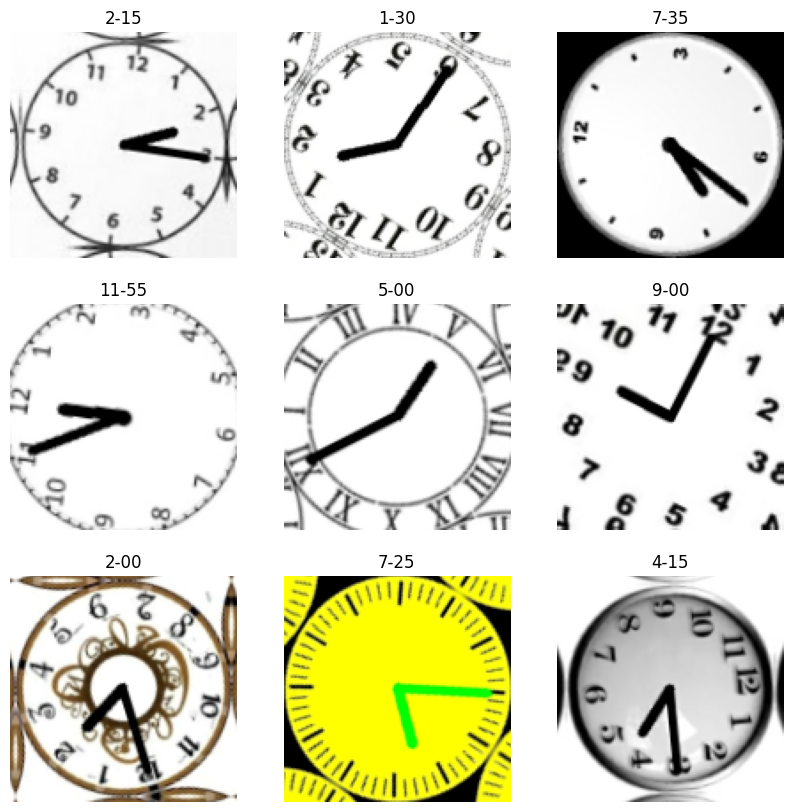

In [7]:
# Justo después de cargar el dataset
class_names = train_data.class_names

data_augmentation = Sequential([
    layers.Resizing(128, 128),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.Rescaling(1./255)  # normaliza valores de píxeles
])

# Luego puedes hacer el map con filtros
train_data = train_data.map(lambda x, y: (data_augmentation(x, training=True), y))


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [8]:
#Filtros
data_augmentation2 = Sequential([
    layers.Rescaling(1./255)  # normaliza valores de píxeles
    ])

test_data = test_data.map(lambda x, y: (data_augmentation2(x, training=False), y))
valid_data = valid_data.map(lambda x, y: (data_augmentation2(x, training=False), y))

In [9]:
num_classes = len(class_names)

# Modelo CNN
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Previene overfitting
    layers.Dense(num_classes, activation='softmax')  # Salida: probabilidades por clase
])

# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # asume etiquetas como números enteros
    metrics=['accuracy']
)


In [ ]:
#Configuración
epochs = 10
steps_per_epoch = 180

#Modelo
history = model.fit(
    train_data,
    validation_data = test_data,
    epochs = epochs,
    steps_per_epoch = steps_per_epoch
)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.0132 - loss: 5.0071

In [ ]:
loss, accuracy = model.evaluate(test_data)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

In [ ]:
#Visualización
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import random

# Convertir a iterador numpy para acceder individualmente
val_iter = valid_data.unbatch().as_numpy_iterator()
val_list = list(val_iter)

# Elegir aleatoriamente una imagen
img, label = random.choice(val_list)

# Preparar para predicción
input_img = np.expand_dims(img, axis=0)
pred = model.predict(input_img)
predicted_class = np.argmax(pred)

# Mostrar
plt.imshow(img)
plt.title(f"Real: {class_names[label]}\nPredicción: {class_names[predicted_class]}")
plt.axis('off')
plt.show()
